In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [411]:
# 2020 Data
full_df = pd.read_csv("../../MVP/Data/full_df.csv")

index_df = full_df[full_df['category'] == 'Index']
index_df['dates'] = index_df['dates'].astype('datetime64[ns]')

dji_df = index_df.loc[index_df['stock'] == 'DJI']
inx_df = index_df.loc[index_df['stock'] == '.INX']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [412]:
# 2008 Data
full_2008_df = pd.read_csv("../../MVP/Data/full_2008_df.csv")

index_08_df = full_2008_df[full_2008_df['category'] == 'Index']
index_08_df['dates'] = index_08_df['dates'].astype('datetime64[ns]')

dji_08_df = index_08_df.loc[index_08_df['stock'] == 'DJI']
inx_08_df = index_08_df.loc[index_08_df['stock'] == '.INX']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [413]:
def close_pct(df):
    df['pct_change'] = round(100 * (df['close'] / float(df.loc[df['dates'] == '2020-02-20']['close'].values)),2)
    return df

In [414]:
def close_08_pct(df):
    df['pct_change'] = round(100 * (df['close'] / float(df.loc[df['dates'] == '2008-09-29']['close'].values)),2)
    return df

In [415]:
def plot_data(df_20, df_08, title, title_08, filename):
    
    #Zooming in around crashes (1 month prior 1 month post)
    df_20 = df_20.sort_values('dates', ascending=True)

    crash_20 = (df_20['dates'] >= '2020-01-28')
    crash_20_df = df_20.loc[crash_20]

    df_08 = df_08.sort_values('dates', ascending=True)
    crash_08 = (df_08['dates'] >= '2008-08-29') & (df_08['dates'] <= '2008-10-29')
    crash_08_df = df_08.loc[crash_08]

    #Plotting 2020 crash data vs 2008 crash data
    fig = plt.figure(figsize=(20,10))                                       
    
    ax = fig.add_subplot(211)                                                  
    crash_20_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    
    x_20 = mdates.date2num(crash_20_df['dates'].tolist())                           
    y_20 = crash_20_df['close'].tolist()
    z_20 = np.polyfit(x_20, y_20, 8)
    p_20 = np.poly1d(z_20)
    plt.plot(x_20,p_20(x_20), 'r--')                                           
    
    plt.grid()
                         
    ax = fig.add_subplot(212)                                                  
    crash_08_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title_08)
    
    x_08 = mdates.date2num(crash_08_df['dates'].tolist())                           
    y_08 = crash_08_df['close'].tolist()
    z_08 = np.polyfit(x_08, y_08, 8)
    p_08 = np.poly1d(z_08)
    plt.plot(x_08,p_08(x_08), 'r--')                                                 
    
    plt.grid()
    
    plt.tight_layout()
    plt.savefig("../../Final/Images/" + filename)
    plt.show()                                                              
    
    return ax

In [416]:
def plot_pct_data(df_20, df_08, title, title_08, filename):
    
    #Zooming in around crashes (1 month prior 1 month post)
    df_20 = df_20.sort_values('dates', ascending=True)

    crash_20 = (df_20['dates'] >= '2020-01-20')
    crash_20_df = df_20.loc[crash_20]

    df_08 = df_08.sort_values('dates', ascending=True)
    crash_08 = (df_08['dates'] >= '2008-08-29') & (df_08['dates'] <= '2008-10-29')
    crash_08_df = df_08.loc[crash_08]
    
    one_week_20 = df_20.loc[df_20['dates'] == '2020-02-27', ['pct_change']]
    one_week_20 = one_week_20.iloc[0]['pct_change']

    two_weeks_20 = df_20.loc[df_20['dates'] == '2020-03-05', ['pct_change']]
    two_weeks_20 = two_weeks_20.iloc[0]['pct_change']

    three_weeks_20 = df_20.loc[df_20['dates'] == '2020-03-12', ['pct_change']]
    three_weeks_20 = three_weeks_20.iloc[0]['pct_change']
    
    one_week_08 = df_08.loc[df_08['dates'] == '2008-10-06', ['pct_change']]
    one_week_08 = one_week_08.iloc[0]['pct_change']

    two_weeks_08 = df_08.loc[df_08['dates'] == '2008-10-13', ['pct_change']]
    two_weeks_08 = two_weeks_08.iloc[0]['pct_change']

    three_weeks_08 = df_08.loc[df_08['dates'] == '2008-10-20', ['pct_change']]
    three_weeks_08 = three_weeks_08.iloc[0]['pct_change']

    #Plotting 2020 crash data vs 2008 crash data
    fig = plt.figure(figsize=(20,10))                                       
    
    ax = fig.add_subplot(211)                                                  
    crash_20_df.plot(y='pct_change', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Daily Percent Change')
    plt.title(title)
    
    plt.axhline(y=100, color='r', linestyle='--', alpha=0.5)
    
    ax.annotate('Date of Crash', ('2020-02-20', 100),
            xytext=(0.4, 0.8), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')
    ax.annotate('1 Week Post Crash', ('2020-02-27', one_week_20),
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')
    ax.annotate('2 Weeks Post Crash', ('2020-03-05', two_weeks_20),
            xytext=(0.6, 0.5), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')
    ax.annotate('3 Weeks Post Crash', ('2020-03-12', three_weeks_20),
            xytext=(0.7, 0.1), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')
    
    plt.grid()
                         
    ax = fig.add_subplot(212)                                                  
    crash_08_df.plot(y='pct_change', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Daily Percent Change')
    plt.title(title_08)
    
    plt.axhline(y=100, color='r', linestyle='--', alpha=0.5)
    
    ax.annotate('Date of Crash', ('2008-09-29', 100),
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')
    ax.annotate('1 Week Post Crash', ('2008-10-06', one_week_08),
            xytext=(0.6, 0.3), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')
    ax.annotate('2 Weeks Post Crash', ('2008-10-13', two_weeks_08),
            xytext=(0.7, 0.5), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')
    ax.annotate('3 Weeks Post Crash', ('2008-10-20', three_weeks_08),
            xytext=(0.8, 0.1), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')

    plt.grid()
    
    plt.tight_layout()
    plt.savefig("../../Final/Images/" + filename)
    plt.show()                                                              
    
    return ax

In [417]:
def get_pct_change_df(df_20, df_08, index_20, index_08):
    
    one_week_20 = df_20.loc[df_20['dates'] == '2020-02-27', ['pct_change']]
    one_week_20 = one_week_20.iloc[0]['pct_change']

    two_weeks_20 = df_20.loc[df_20['dates'] == '2020-03-05', ['pct_change']]
    two_weeks_20 = two_weeks_20.iloc[0]['pct_change']

    three_weeks_20 = df_20.loc[df_20['dates'] == '2020-03-12', ['pct_change']]
    three_weeks_20 = three_weeks_20.iloc[0]['pct_change']

    one_week_08 = df_08.loc[df_08['dates'] == '2008-10-06', ['pct_change']]
    one_week_08 = one_week_08.iloc[0]['pct_change']

    two_weeks_08 = df_08.loc[df_08['dates'] == '2008-10-13', ['pct_change']]
    two_weeks_08 = two_weeks_08.iloc[0]['pct_change']

    three_weeks_08 = df_08.loc[df_08['dates'] == '2008-10-20', ['pct_change']]
    three_weeks_08 = three_weeks_08.iloc[0]['pct_change']
    
    pct_change_df = pd.DataFrame({index_20 : [one_week_20, two_weeks_20, three_weeks_20],
                                  index_08 : [one_week_08, two_weeks_08, three_weeks_08]},
                                  index = ['One Week Post Crash', 'Two Weeks Post Crash', 'Three Weeks Post Crash'])
    pct_change_df['% Difference'] = abs(pct_change_df[index_20] - pct_change_df[index_08])
    return pct_change_df

In [418]:
def get_pct_df(df_20, df_08, index):
    df_20 = df_20.sort_values('dates', ascending=True)

    crash_20_dates = (df_20['dates'] >= '2020-01-22') & (df_20['dates'] <= '2020-03-23')
    crash_20_df = df_20.loc[crash_20_dates]

    df_08 = df_08.sort_values('dates', ascending=True)
    crash_08 = (df_08['dates'] >= '2008-08-29') & (df_08['dates'] <= '2008-10-29')
    crash_08_df = df_08.loc[crash_08]

    pct_change_20_df = crash_20_df['pct_change'].reset_index()
    #pct_change_20_df = pct_change_20_df.drop(columns=['index'])
    pct_change_20_df = pct_change_20_df.rename(columns = {'pct_change': '2020 ' + index + ' % Change'})

    pct_change_08_df = crash_08_df['pct_change'].reset_index()
    #pct_change_08_df = pct_change_08_df.drop(columns=['index'])
    pct_change_08_df = pct_change_08_df.rename(columns = {'pct_change':'2008 ' + index + ' % Change'})

    df8 = pd.concat([pct_change_20_df, pct_change_08_df], axis=1)
    df8['Difference of ' + index + ' % Change'] = abs(df8['2020 ' + index + ' % Change'] - df8['2008 ' + index + ' % Change'])
    
    return df8

In [419]:
def plot_new_pct_data(df_20, df_08, index):  
    pct_df = get_pct_df(df_20, df_08, index).reset_index()
    pct_df = pct_df.drop(columns=['index'])

    fig = plt.figure(figsize=(20,10))                                       

    ax = fig.add_subplot(211)                                                  
    pct_df.plot(y=['2020 ' + index + ' % Change', '2008 ' + index + ' % Change'], x='level_0', kind='line', ax=ax)
    plt.xlabel('Date')
    plt.ylabel('Daily Percent Value')
    plt.title('2020 vs 2008 ' + index + ' Daily Percent Change Based on Day of Crash')
    
    x_20 = pct_df['level_0'].tolist()                           
    y_20 = pct_df['2020 ' + index + ' % Change'].tolist()
    z_20 = np.polyfit(x_20, y_20, 8)
    p_20 = np.poly1d(z_20)
    plt.plot(x_20,p_20(x_20), '--', color="blue")
    
    x_08 = pct_df['level_0'].tolist()                           
    y_08 = pct_df['2008 ' + index + ' % Change'].tolist()
    z_08 = np.polyfit(x_08, y_08, 8)
    p_08 = np.poly1d(z_08)
    plt.plot(x_08,p_08(x_08), '--', color='orange')
    
    

    plt.axhline(y=100, color='r', linestyle='--', alpha=0.5)

    ax.annotate('Date of Crash', (20, 100),
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops = dict(facecolor='grey', color='grey'),
            horizontalalignment='right')

    plt.grid()

    plt.tight_layout()
    plt.savefig("../../Final/Images/" + index + "_pct_change.svg")
    plt.show()
    
    return ax

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RankWarning: Polyfit may be poorly conditioned
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RankWarning: Polyfit may be poorly conditioned


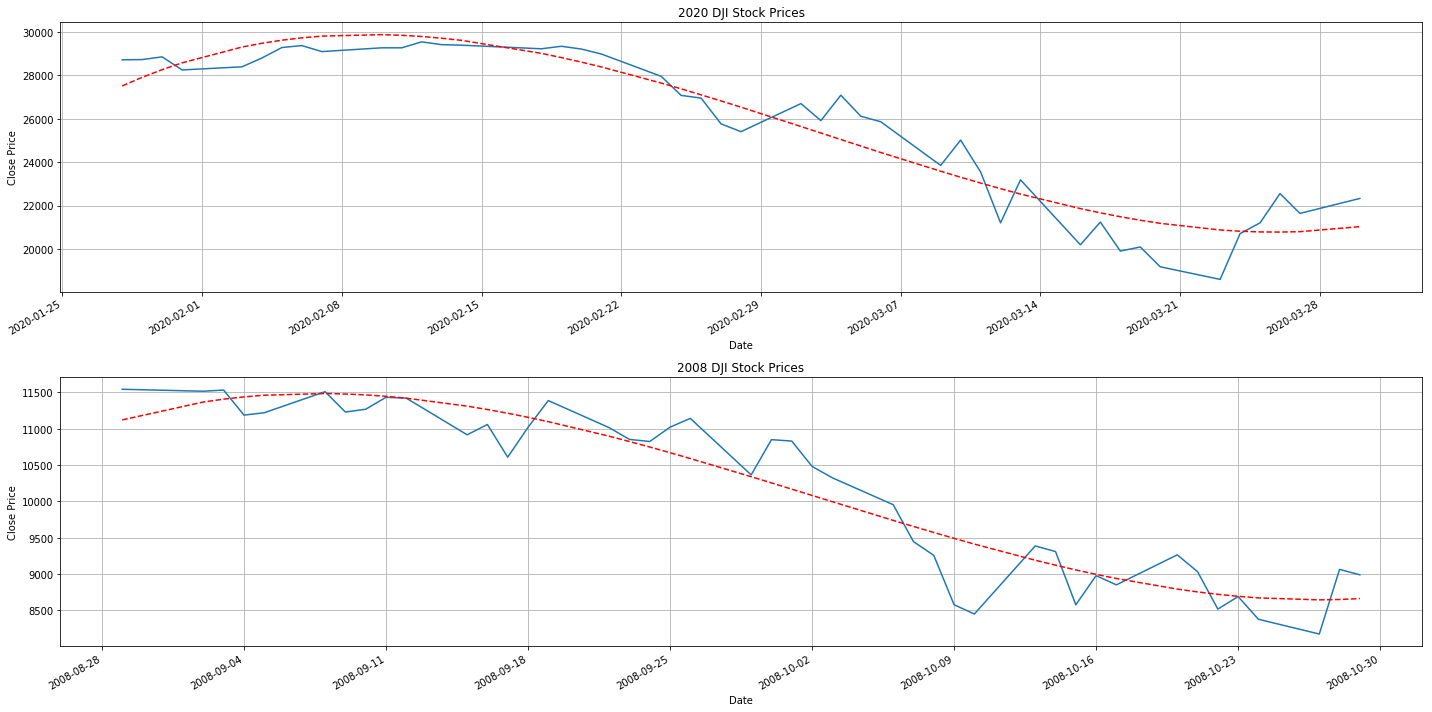

In [420]:
DJI_chart = plot_data(dji_df, dji_08_df, '2020 DJI Stock Prices', '2008 DJI Stock Prices', 'DJI_20vs08.svg')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RankWarning: Polyfit may be poorly conditioned
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RankWarning: Polyfit may be poorly conditioned


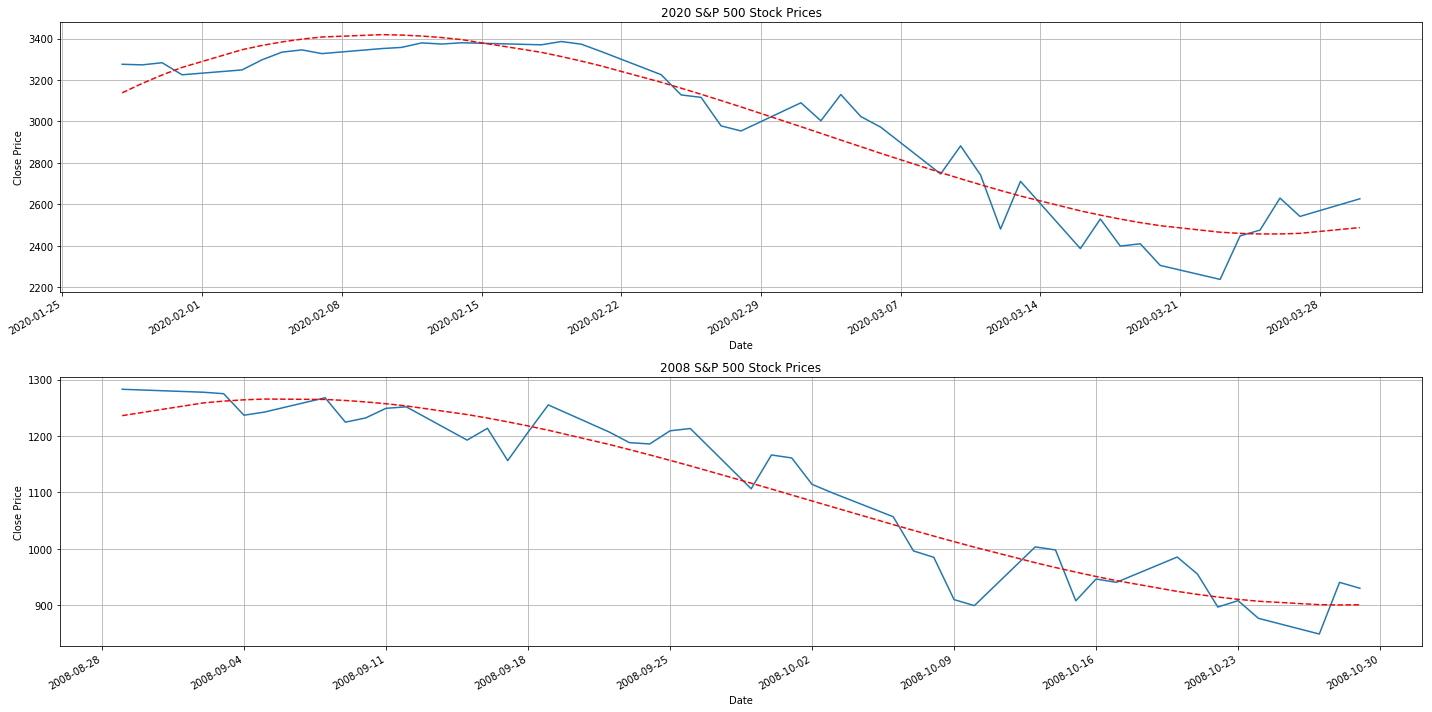

In [421]:
INX_chart = plot_data(inx_df, inx_08_df, '2020 S&P 500 Stock Prices', '2008 S&P 500 Stock Prices', 'inx_20vs08.svg')

In [422]:
close_pct(dji_df)
close_pct(inx_df)
close_08_pct(dji_08_df)
close_08_pct(inx_08_df)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dates,stock,open,close,high,low,volume,category,pct_change
3302,2009-04-01,.INX,793.5900,811.0800,813.6200,783.3200,6034140000,Index,73.31
3303,2009-03-31,.INX,790.8800,797.8700,810.4800,790.8800,6089100000,Index,72.11
3304,2009-03-30,.INX,809.0700,787.5300,809.0700,779.8100,5912660000,Index,71.18
3305,2009-03-27,.INX,828.6800,815.9400,828.6800,813.4300,5600210000,Index,73.75
3306,2009-03-26,.INX,814.0600,832.8600,832.9800,814.0600,6992960000,Index,75.28
3307,2009-03-25,.INX,806.8100,813.8800,826.7800,791.3700,7687180000,Index,73.56
3308,2009-03-24,.INX,820.6000,806.1200,823.6500,805.4800,6767980000,Index,72.86
3309,2009-03-23,.INX,772.3100,822.9200,823.3700,772.3100,7715770000,Index,74.38
3310,2009-03-20,.INX,784.5800,768.5400,788.9100,766.2000,7643720000,Index,69.46
3311,2009-03-19,.INX,797.9200,784.0400,803.2400,781.8200,9033870000,Index,70.86


/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


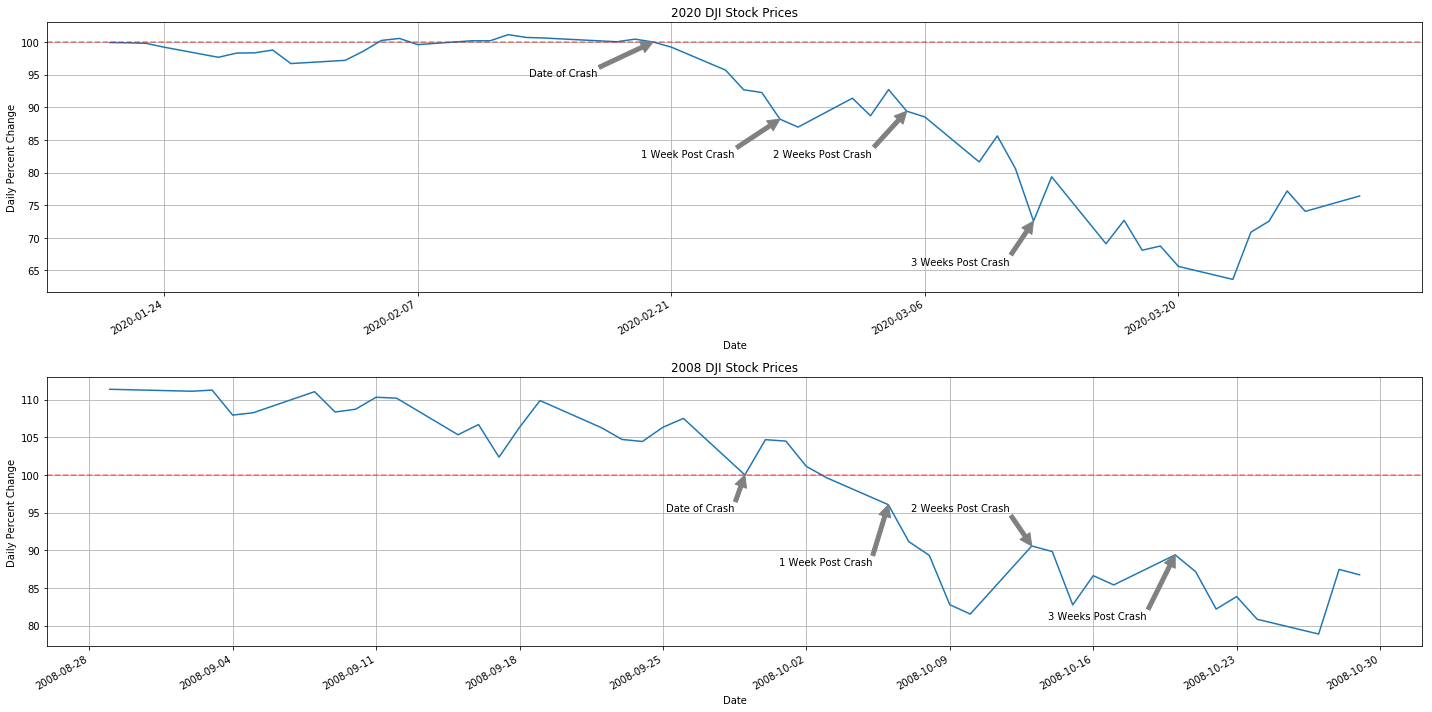

In [423]:
DJI_pct_chart = plot_pct_data(dji_df, dji_08_df, '2020 DJI Stock Prices', '2008 DJI Stock Prices', 'DJI_20vs08_pct.svg')

/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


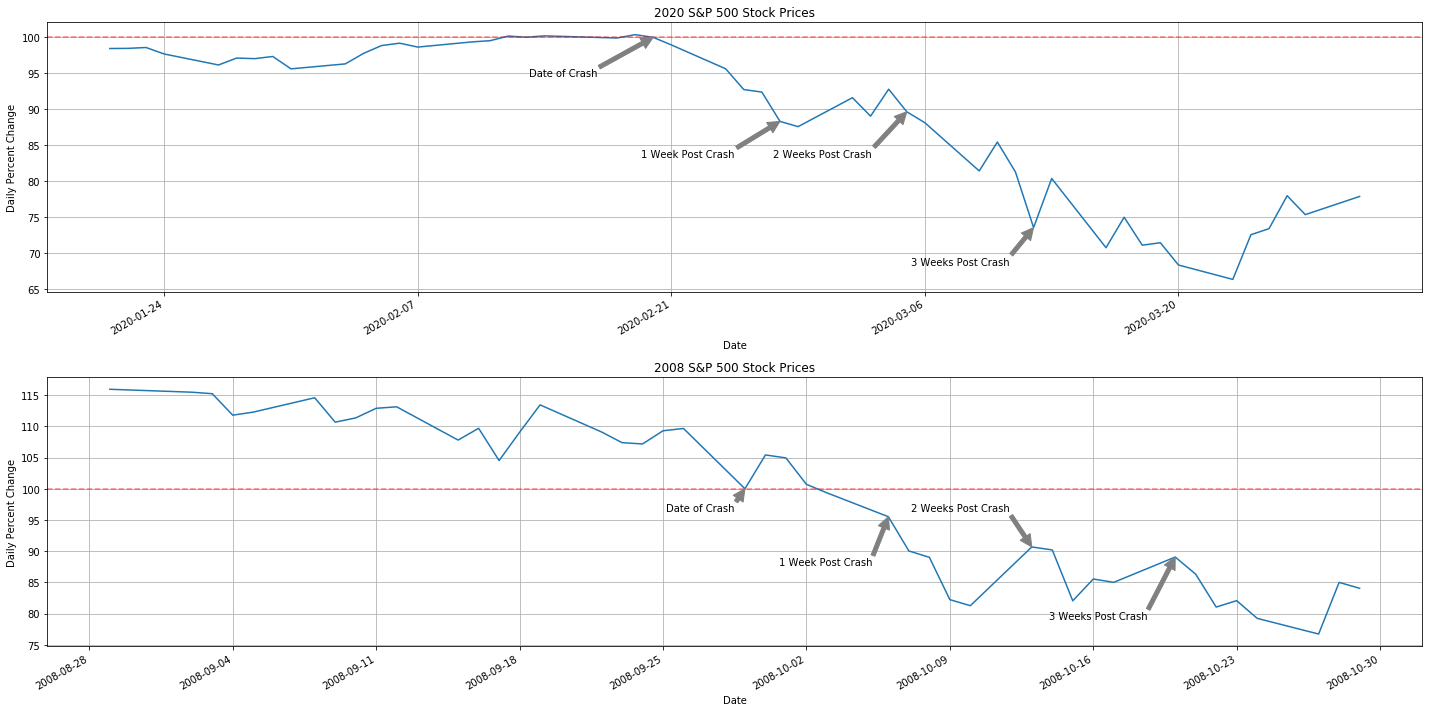

In [424]:
INX_pct_chart = plot_pct_data(inx_df, inx_08_df, '2020 S&P 500 Stock Prices', '2008 S&P 500 Stock Prices', 'INX_20vs08_pct.svg')

/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


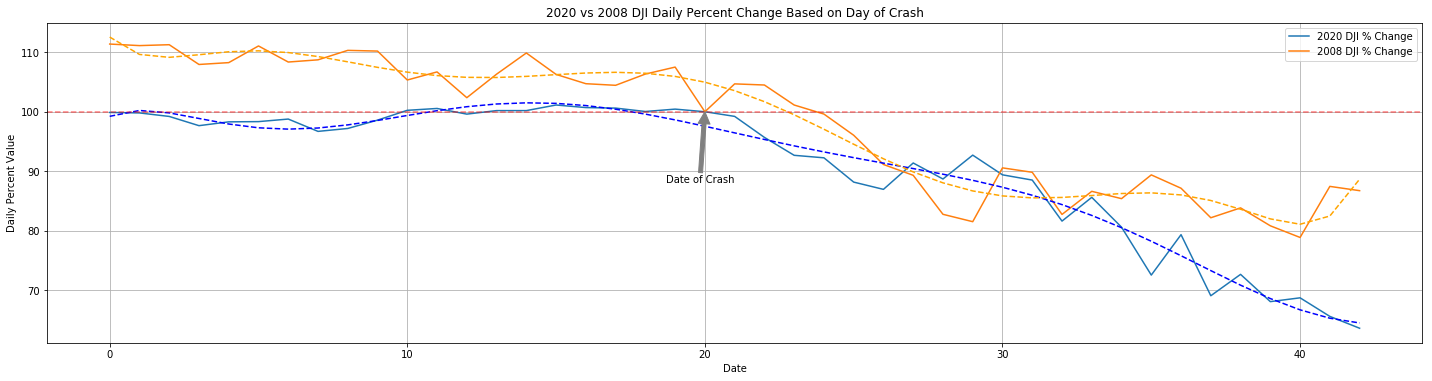

In [425]:
plot_new_pct_data(dji_df, dji_08_df, 'DJI')

/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


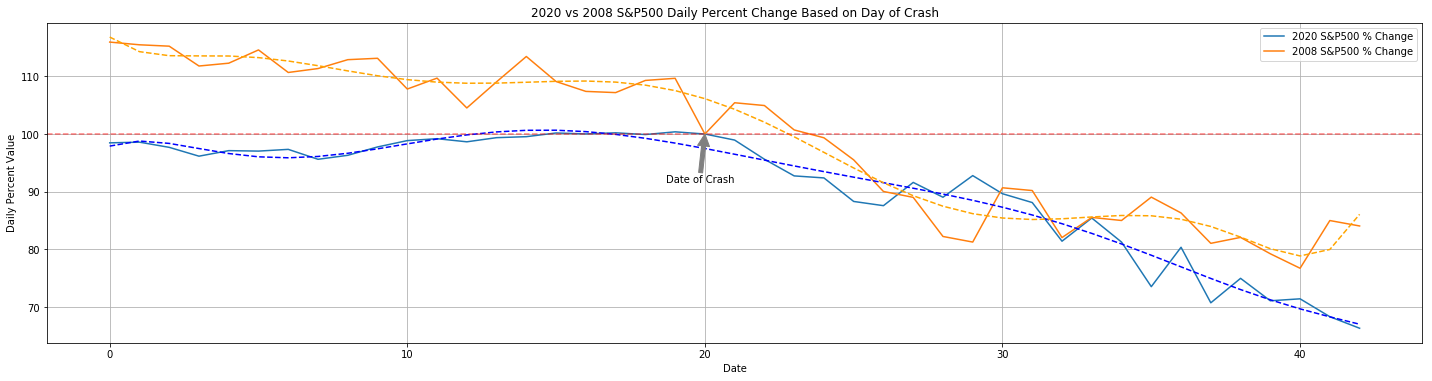

In [426]:
plot_new_pct_data(inx_df, inx_08_df, 'S&P500')

In [427]:
get_pct_change_df(dji_df, dji_08_df, 'DJI 2020 % Change', 'DJI 2008 % Change')

,DJI 2020 % Change,DJI 2008 % Change,% Difference
One Week Post Crash,88.18,96.05,7.87
Two Weeks Post Crash,89.40,90.57,1.17
Three Weeks Post Crash,72.56,89.39,16.83


In [428]:
get_pct_change_df(inx_df, inx_08_df, 'S&P500 2020 % Change', 'S&P500 2008 % Change')

,S&P500 2020 % Change,S&P500 2008 % Change,% Difference
One Week Post Crash,88.31,95.52,7.21
Two Weeks Post Crash,89.65,90.68,1.03
Three Weeks Post Crash,73.54,89.06,15.52
